# Example 1: The image and probe reconstruction from simulated frames

In [1]:
import sys
import time
from datetime import timedelta, datetime, tzinfo
import argparse
import numpy as np
import h5py
import sharp
import sharpnsls2
import matplotlib.pyplot as plt
# make graphics inline
# %matplotlib inline
%matplotlib notebook

In [2]:
sharpNSLS2 = sharpnsls2.PythonSharpNSLS2()

Set the input parameters and initialize containers

In [4]:
niters = 101
args = ['local', '-o', '10',  'e1.cxi']

t1 = datetime.now();
sharpNSLS2.init(args)
t2 = datetime.now()

print ("initialization time: ", (t2 - t1))

initialization time:  0:00:06.686718


Plot the initial image

<IPython.core.display.Javascript object>


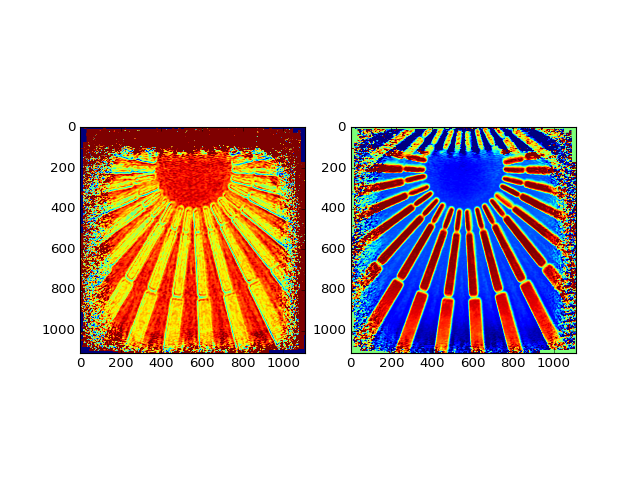

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2)

image = sharpNSLS2.getImage()
ax1.imshow(np.abs(image))
ax2.imshow(np.angle(image))  
f.canvas.draw()

Define a function for processing and monitoring one iteration of the reconstruction algorithm

In [6]:
def make_step(i):
    sharpNSLS2.step()
    image = sharpNSLS2.getImage()
    ax1.imshow(np.abs(image))
    ax2.imshow(np.angle(image))  
    f.canvas.draw()

Run the reconstruction algorithm

In [9]:
t1 = datetime.now();
for i in range(niters):
    make_step(i)
t2 = datetime.now()    
print ("initialization time: ", (t2 - t1))

initialization time:  0:01:40.437703


Write results of the reconstruction into the cxi file

In [7]:
sharpNSLS2.writeImage()